#### Import Necessary Libraries

In [16]:
import pandas as pd

#### Task 1: Merging 12 months of sales data into a single file

In [17]:
import os

# Set up file path
file_path = "./Sales_Data/"

# List all the files in the file path using listdir function
file_list = os.listdir(file_path)

#Create empty dataframe and merge all sales data into the dataframe
df = pd.DataFrame()
for file in file_list:
    data = pd.read_csv(file_path + file)
    df = pd.concat([df, data], axis = 0)

#Count the number of rows for each columns in the dataframe
df.count(axis=0)

#Convert to a single merged file
df.to_csv("Merged_Sales_Data.csv", index=False)

#### Read in updated dataframe and clean up the data

In [18]:
all_data = pd.read_csv("Merged_Sales_Data.csv")

# drop all empty rows
all_data = all_data.dropna(how='all')

# drop all invalid rows where the order ID is not digit
all_data = all_data[all_data['Order ID'] != 'Order ID']

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Question 1: What was best month for sales? How much was earned that month ?


#### Task 2: Add additional month column

In [19]:
# convert Order Date column into datetime type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

C:\Users\emily\AppData\Local\Temp\ipykernel_14424\4142616740.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


#### Task 3: Add additional sales column (Quantity * Price)

In [20]:
#Convert the Quantity Ordered into int data type
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
#Convert the Price Each into float data type
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data["Sales"] = all_data["Quantity Ordered"] * all_data ["Price Each"]

#### Task 4: Groupby month

In [21]:
# Add month column
all_data['Month'] = all_data['Order Date'].dt.month

# Slice the Month and Sales columns
monthly_sale_data = all_data[['Month', 'Sales']]

# Group by month then sum the total sales for each month
monthly_sale_data = monthly_sale_data.groupby('Month', sort=True).sum()

monthly_sale_data


,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


#### Task 5: Print the result represent the month with the highest sales

In [22]:
# Print the max sales and the month correspond with the max sales
max_sales = monthly_sale_data['Sales'].max()
min_sales = monthly_sale_data['Sales'].min()
max_month = monthly_sale_data['Sales'].idxmax()

print(f"The maximum sales is {max_sales:,} USD in the month {max_month}.")

The maximum sales is 4,613,443.34 USD in the month 12.


#### Task 6: Plot the graph represent 12 months sales

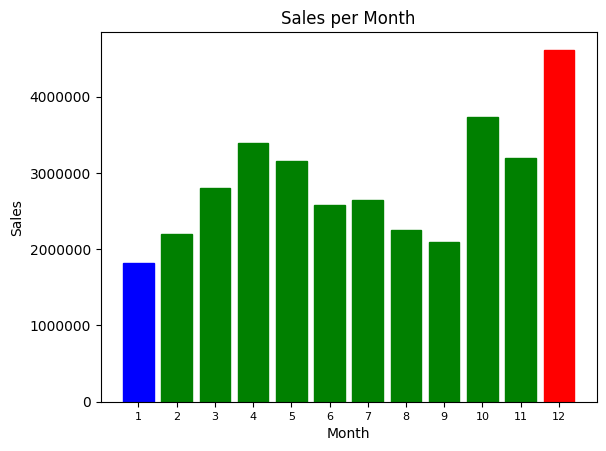

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bars = ax.bar(monthly_sale_data.index.to_list(), monthly_sale_data["Sales"])
for bar in bars:
    if bar.get_height() == max_sales:
        bar.set_color('red')
    elif bar.get_height() == min_sales:
        bar.set_color('blue')
    else:
        bar.set_color('green')
        
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(monthly_sale_data.index.tolist(), size = 8)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Sales per Month')

plt.show()

#### Question 2: What city has the highest number of sale ?

#### Task 7: Add a city column

In [24]:
#Create new city column
# x = '917 1st St, Dallas, TX 75001'
# x.split(', ') = ['917 1st St', 'Dallas', 'TX 75001']
# x.split(', ')[1] = 'Dallas'
# x.split(', ')[2].split()[0] = 'TX'

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(', ')[1]} {x.split(', ')[2].split()[0]}")

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco CA


#### Task 8: Groupby City

In [25]:
# Slice the City and Sales columns
city_sale_data = all_data[['City', 'Sales']]

# Groupby City
city_sale_data = city_sale_data.groupby('City').sum()

#Print the max sales and the index of max sales
max_city = city_sale_data['Sales'].idxmax()
max_sales = city_sale_data['Sales'].max()

print(f"The city has the highest sales is {max_city} with {max_sales:,} USD.")

The city has the highest sales is San Francisco CA with 8,262,203.91 USD.


#### Task 9: Visualization The City Sales 

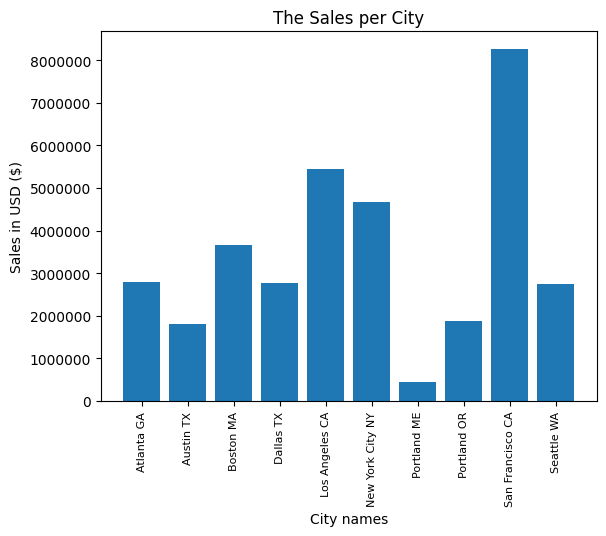

In [26]:
fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.bar(city_sale_data.index.tolist(), city_sale_data["Sales"])
plt.title("The Sales per City")
plt.xticks(city_sale_data.index.tolist(), rotation= 'vertical', size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City names")
plt.show()

##### Conclusion draw from the visualization: San Francisco is the city that consump the highest volume of products while Portland (ME) is the city that comsump the lowest volume of products. 

#### Question 3: What time should we display the advertisements to maximize the likelihood of customer's buying products ?

#### Task 10: Add Hour and Minute columns

In [27]:
#Create Hour and Minute columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco CA,17,30


#### Task 11: Visualization the Sales distribution by hour

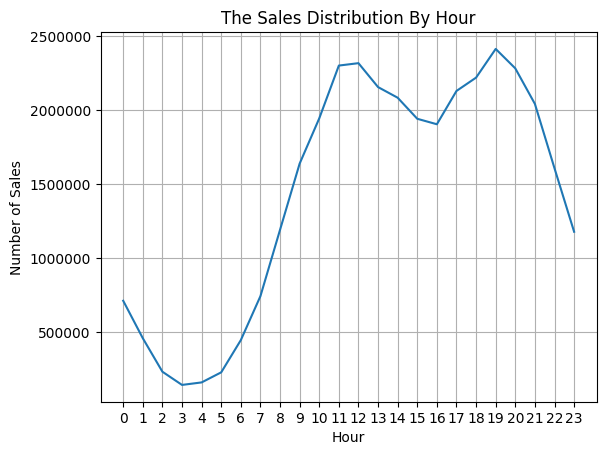

In [28]:
hour_count = all_data[['Hour', 'Sales']]

hour_count = hour_count.groupby('Hour').sum()

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.plot(hour_count)
plt.title("The Sales Distribution By Hour")
plt.xlabel("Hour")
plt.xticks(hour_count.index.tolist())
plt.grid()
plt.ylabel("Number of Sales")
plt.show()

##### Conclusion draw from the graph: There are two peak hour that have the most sales: 12 PM and 7 PM while in the early morning from 12 AM to 7 AM, it is the least effective time to conduct the advertisment

#### Question 4: What products are most often sold together?

#### Task 12: List out the duplicate order ID (one order buy multiple items)

In [29]:
# product_data = all_data[['Order ID', 'Product']]
# product_data['Product'] = product_data['Product'].apply(lambda x: f'{x}, ')
# product_combo = product_data.groupby('Order ID').sum()
# product_combo = product_combo.rename(columns={'Product': 'Product Combo'})
# product_combo = product_combo[product_combo['Product Combo'].str.split(', ').apply(lambda x: len(x) > 2)]
# product_combo['Amount'] = product_combo.groupby('Product Combo')['Product Combo'].transform('size')
# product_combo

df = all_data[all_data["Order ID"].duplicated(keep = False)]
df['Grouped'] = all_data.groupby(all_data["Order ID"])["Product"].transform(lambda x: ','.join(x))

C:\Users\emily\AppData\Local\Temp\ipykernel_14424\2264054625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = all_data.groupby(all_data["Order ID"])["Product"].transform(lambda x: ','.join(x))


In [30]:
df = df[["Order ID","Grouped"]].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


#### Task 13: Count paired product in the "Grouped" dictionary 

In [31]:
#Count the pairs of the grouped items
from itertools import combinations
from collections import Counter

count = Counter()

#Count the sold two items together
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print("The combination of", key, "has been sold together", value, "times")

# #If want to count the sold three items together
# for row in df['Grouped']:
#     row_list = row.split(',')
#     count.update(Counter(combinations(row_list,3)))

The combination of ('iPhone', 'Lightning Charging Cable') has been sold together 1005 times
The combination of ('Google Phone', 'USB-C Charging Cable') has been sold together 987 times
The combination of ('iPhone', 'Wired Headphones') has been sold together 447 times
The combination of ('Google Phone', 'Wired Headphones') has been sold together 414 times
The combination of ('Vareebadd Phone', 'USB-C Charging Cable') has been sold together 361 times
The combination of ('iPhone', 'Apple Airpods Headphones') has been sold together 360 times
The combination of ('Google Phone', 'Bose SoundSport Headphones') has been sold together 220 times
The combination of ('USB-C Charging Cable', 'Wired Headphones') has been sold together 160 times
The combination of ('Vareebadd Phone', 'Wired Headphones') has been sold together 143 times
The combination of ('Lightning Charging Cable', 'Wired Headphones') has been sold together 92 times


##### Conclusion draw from this research: The company should encourage the promotion or create smart deal of these pair product to increase the sale volume and lure bigger audience. Use the most product combination analysis as the advantage for the business to create suitable marketing and product plan.

#### Question 5: What product sold the most? Why do you think it sold the most?

In [32]:
# Slice the Product and Sales column
product_sale_data = all_data[['Product', 'Quantity Ordered']]

#Groupby Product
product_sale_data = product_sale_data.groupby("Product").sum()


#Print the max sales product and the quatity orders corresponding
max_product_name = product_sale_data["Quantity Ordered"].idxmax()
max_product_sales = product_sale_data["Quantity Ordered"].max()

print(f"The {max_product_name} was sold the most at {max_product_sales} units")

The AAA Batteries (4-pack) was sold the most at 31017 units


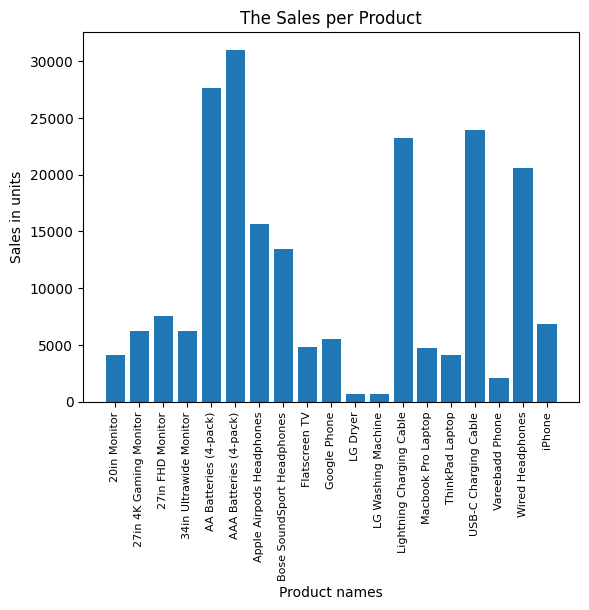

In [35]:
fig, ax1 = plt.subplots()
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.yaxis.get_major_formatter().set_useOffset(False)
ax1.bar(product_sale_data.index.tolist(), product_sale_data["Quantity Ordered"])
plt.title("The Sales per Product")
plt.xticks(product_sale_data.index.tolist(), rotation= 'vertical', size = 8)
plt.ylabel("Sales in units")
plt.xlabel("Product names")
plt.show()

#### Task 14: Overlay the price to the quantity sell to demonstrate the correlation

In [42]:
prices = all_data.groupby("Product").mean("Price Each")
prices["Price Each"]

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\emily\AppData\Local\Temp\ipykernel_14424\835342980.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_sale_data.index.tolist(), rotation= 'vertical', size = 8)


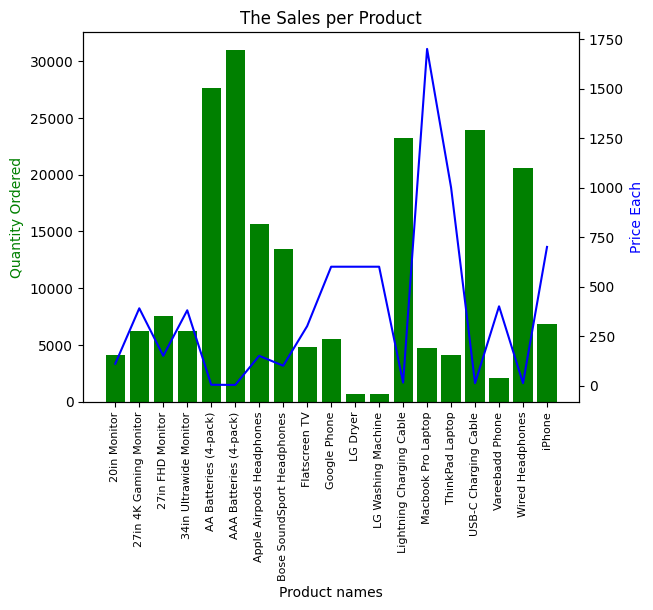

In [43]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.yaxis.get_major_formatter().set_useOffset(False)

ax1.bar(product_sale_data.index.tolist(), product_sale_data["Quantity Ordered"], color="g")
ax2.plot(product_sale_data.index.tolist(), prices["Price Each"], "b-")

plt.title("The Sales per Product")
ax1.set_xticklabels(product_sale_data.index.tolist(), rotation= 'vertical', size = 8)
ax1.set_ylabel("Quantity Ordered", color = "g")
ax2.set_ylabel("Price Each", color = "b")
ax1.set_xlabel("Product names")
plt.show()
